In [11]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
weight = 0.7
bias = 0.3

x = torch.arange(0,1,0.01).unsqueeze(dim=1)
y = weight * x + bias

In [3]:
x[:5]

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400]])

In [4]:
y[:5]

tensor([[0.3000],
        [0.3070],
        [0.3140],
        [0.3210],
        [0.3280]])

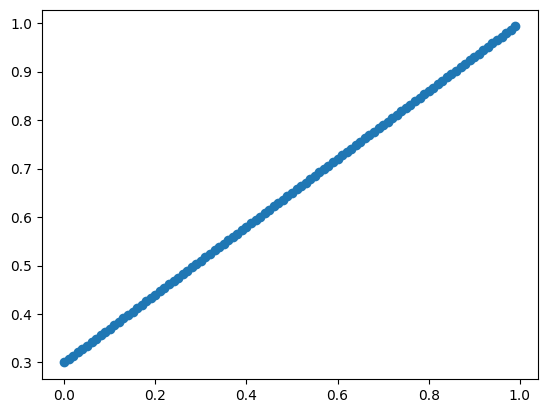

In [5]:
plt.scatter(x, y);

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([80, 1]) torch.Size([80, 1])
torch.Size([20, 1]) torch.Size([20, 1])


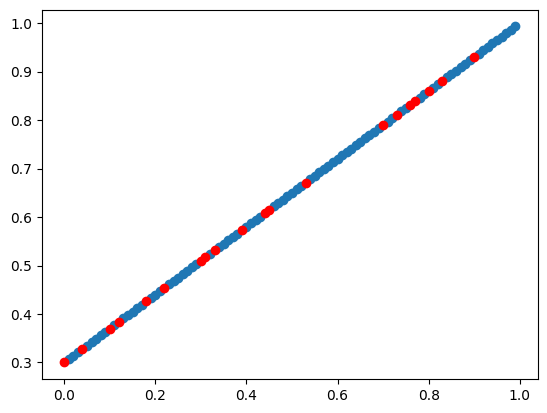

In [7]:
plt.scatter(x_train, y_train);
plt.scatter(x_test, y_test, c='r');

In [8]:
class lr(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=10):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)


model = lr(1, 1)

In [9]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [10]:
epochs = 5000

for epoch in range(epochs):
  model.train()
  train_pred = model(x_train)
  train_loss = loss_fn(train_pred, y_train)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_pred = model(x_test)
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {train_loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.3701666593551636 | Test Loss: 0.30409368872642517
Epoch: 100 | Loss: 0.03280008211731911 | Test Loss: 0.013862082734704018
Epoch: 200 | Loss: 0.031091446056962013 | Test Loss: 0.014871959574520588
Epoch: 300 | Loss: 0.028347864747047424 | Test Loss: 0.01694968342781067
Epoch: 400 | Loss: 0.02548929490149021 | Test Loss: 0.019151851534843445
Epoch: 500 | Loss: 0.023572660982608795 | Test Loss: 0.01934322901070118
Epoch: 600 | Loss: 0.025065844878554344 | Test Loss: 0.017921334132552147
Epoch: 700 | Loss: 0.024185488000512123 | Test Loss: 0.018006879836320877
Epoch: 800 | Loss: 0.024235572665929794 | Test Loss: 0.01718488149344921
Epoch: 900 | Loss: 0.023863444104790688 | Test Loss: 0.016873588785529137
Epoch: 1000 | Loss: 0.02240886352956295 | Test Loss: 0.017657190561294556
Epoch: 1100 | Loss: 0.022565443068742752 | Test Loss: 0.016823694109916687
Epoch: 1200 | Loss: 0.021632850170135498 | Test Loss: 0.01708795502781868
Epoch: 1300 | Loss: 0.02173244021832943 | Test 

In [12]:
mean_squared_error(y_test, test_pred)

0.00027396224

In [13]:
model.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[-0.5262],
                      [-0.9122],
                      [-0.7007],
                      [-0.3041],
                      [ 0.9776],
                      [ 0.6034],
                      [ 0.7379],
                      [-0.2916],
                      [ 0.1657],
                      [-0.7310]])),
             ('linear_layer_stack.0.bias',
              tensor([-0.5308,  0.3195, -0.2317,  0.2616, -0.0852,  0.1868, -0.2810, -0.5358,
                       0.2285,  0.7541])),
             ('linear_layer_stack.1.weight',
              tensor([[ 0.0330, -0.2523,  0.0787,  0.2580,  0.1693, -0.0718,  0.0654,  0.2898,
                       -0.3034,  0.2282],
                      [ 0.1559, -0.0495,  0.2071,  0.0338,  0.0998, -0.2291,  0.1239,  0.0838,
                       -0.0363,  0.1635],
                      [-0.0296,  0.2834, -0.1663,  0.0080, -0.2385,  0.1359, -0.2047, -0.1477,
                        0.29